In [1]:
# Time Series Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Find available dataset names in seaborn
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [3]:
df = sns.load_dataset('flights')
df.head

<bound method NDFrame.head of      year month  passengers
0    1949   Jan         112
1    1949   Feb         118
2    1949   Mar         132
3    1949   Apr         129
4    1949   May         121
..    ...   ...         ...
139  1960   Aug         606
140  1960   Sep         508
141  1960   Oct         461
142  1960   Nov         390
143  1960   Dec         432

[144 rows x 3 columns]>

In [4]:
# We get only year and month for the date. We need the day also.

# Convert the date to a YYYY-MM-DD format in a new column named yearMonth
df['yearMonth'] = '01-'+df['month'].astype(str)+'-'+df['year'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearMonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


In [5]:
# yearMonth is of object type - we need it in the date format

df['yearMonth'] = pd.to_datetime(df['yearMonth'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   year        144 non-null    int64         
 1   month       144 non-null    category      
 2   passengers  144 non-null    int64         
 3   yearMonth   144 non-null    datetime64[ns]
dtypes: category(1), datetime64[ns](1), int64(2)
memory usage: 4.0 KB


In [6]:
#  Make yearMonth coln as the dataframe index

df.set_index('yearMonth',inplace=True) # inplace will make the changes permanent to the df

df.head()

,year,month,passengers
yearMonth,,,
1949-01-01,1949,Jan,112
1949-02-01,1949,Feb,118
1949-03-01,1949,Mar,132
1949-04-01,1949,Apr,129
1949-05-01,1949,May,121


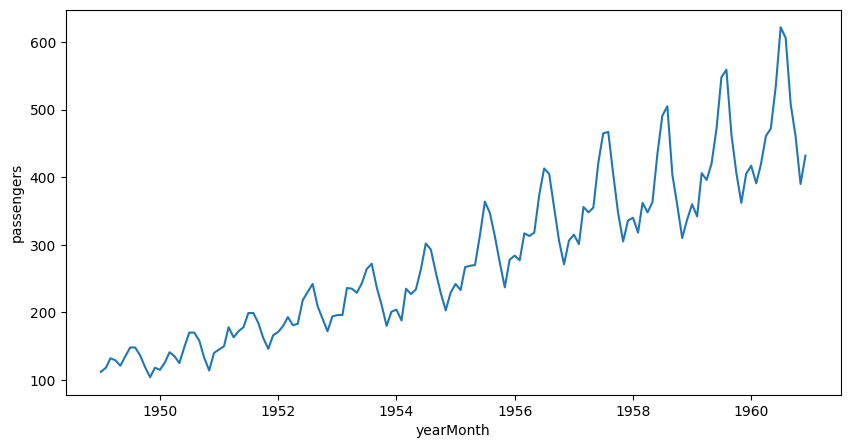

In [7]:
# visualize the time series

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x = df.index,y = df.passengers)
plt.show()

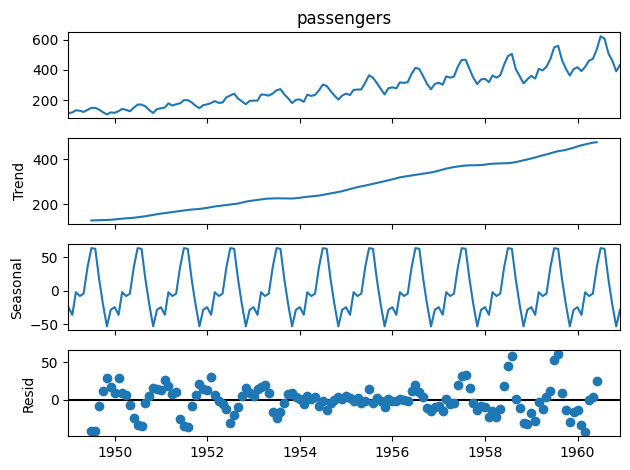

In [8]:
# check further for seasonality and trend by doing decomposition

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df.passengers,period=12)
fig = decomposition.plot()
plt.show()

In [9]:
# upward trend and clear seasonality

# check if the time series is stationary

# rolling mean and std dev for 12 month

df['rollMean'] = df.passengers.rolling(window=12).mean()
df['rollStd'] = df.passengers.rolling(window=12).std()

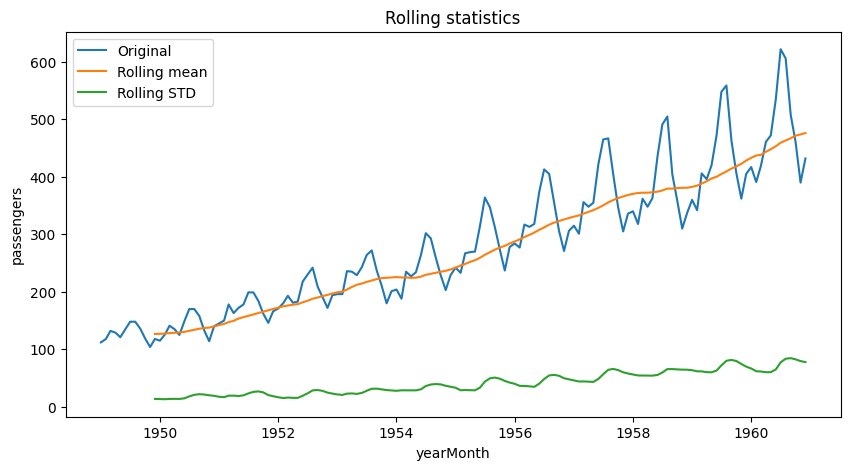

In [10]:
# plot original series with the rolling mean and std

plt.figure(figsize=(10,5))
sns.lineplot(data=df,x=df.index,y=df.passengers,label="Original")
sns.lineplot(data=df,x=df.index,y=df.rollMean,label="Rolling mean")
sns.lineplot(data=df,x=df.index,y=df.rollStd,label="Rolling STD")
plt.title('Rolling statistics')
plt.show()

In [11]:
# plt.figure(figsize=(10,5))
# sns.lineplot(x = df['yearMonth'], y = df['passengers'])
# plt.show()
df.head()

,year,month,passengers,rollMean,rollStd
yearMonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


# a time series is stationary if the rolling mean and rolling std dev are in a straight-like line 
# a- mean is NOT in a straight line
# b- std dev is in a stright line
# Conclusion : Our time series is NOT stationary.

# if a time series is not stationary - we cannot make predictions about the future dates...

In [12]:
# Define the function for stationary check (only p-value based)

def test_stationary(dataFrame,var):
    dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
    dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


    from statsmodels.tsa.stattools import adfuller
    adf_result = adfuller(dataFrame[var])
    p_value = adf_result[1]

    print(f'ADF VAlue:  {p_value:.4f}')
    if p_value < 0.05:
        print("time series is stationary")
    else:
        print("Not stationary")

    # PLot
    plt.figure(figsize=(10,5))
    sns.lineplot(data=dataFrame,x = dataFrame.index,y=var,label="Original")   
    sns.lineplot(data=dataFrame,x = dataFrame.index,y='rollMean',label="RollMean") 
    sns.lineplot(data=dataFrame,x = dataFrame.index,y="rollStd",label="Rollstd")  
    plt.title("Stationay check using rolling mean and std dev")
    plt.legend()
    plt.show()



ADF VAlue:  0.9919
Not stationary


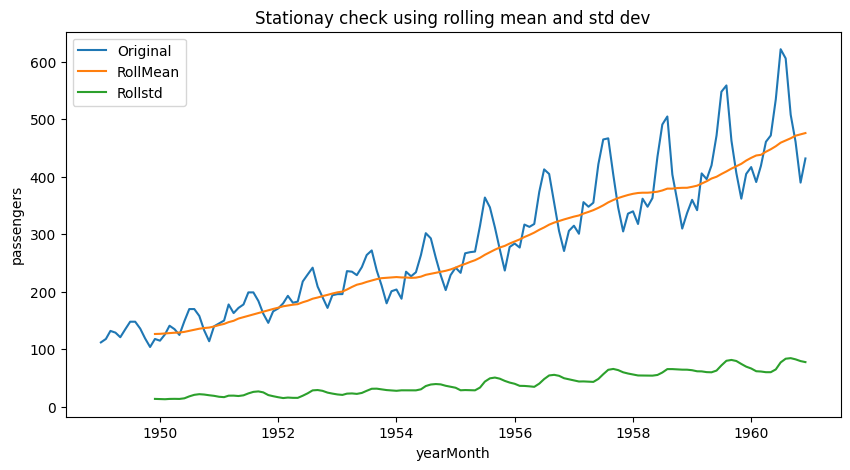

In [13]:
# Calling the function to test stationary

test_stationary(df,'passengers')

In [ ]:
# Just get the passengers column into a new datframe for easier testing
air_df = df[['passengers']].copy()

# Try a shift-diff of 1

air_df['shift'] = air_df['passengers'].shift(1)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118  112.0        6.0
1949-03-01         132  118.0       14.0
1949-04-01         129  132.0       -3.0
1949-05-01         121  129.0       -8.0
1949-06-01         135  121.0       14.0
1949-07-01         148  135.0       13.0
1949-08-01         148  148.0        0.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  136.0      -17.0
1949-11-01         104  119.0      -15.0
1949-12-01         118  104.0       14.0
1950-01-01         115  118.0       -3.0
1950-02-01         126  115.0       11.0
1950-03-01         141  126.0       15.0
1950-04-01         135  141.0       -6.0
1950-05-01         125  135.0      -10.0
1950-06-01         149  125.0       24.0
1950-07-01         170  149.0       21.0
1950-08-01         170  170.0        0.0


ADF VAlue:  0.0542
Not stationary


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_1000\1138534307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_1000\1138534307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


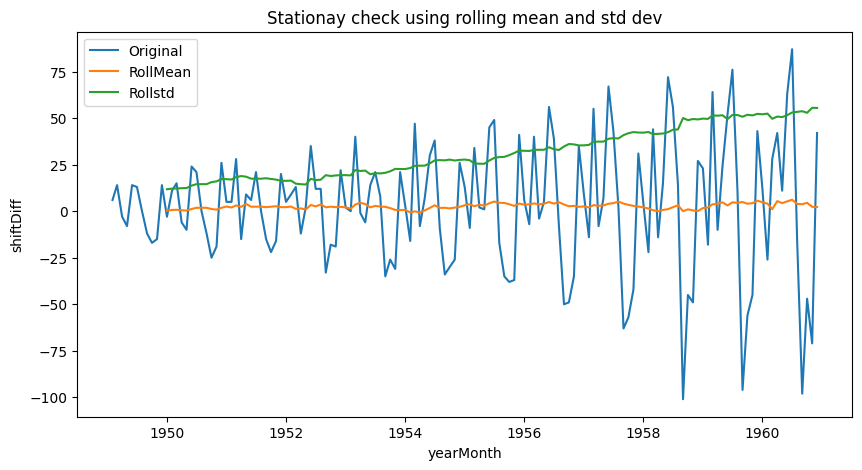

In [15]:
# Test stationarity

test_stationary(air_df.dropna(),'shiftDiff')

In [16]:
# Conclusion: p_value > 0.05, so we cannot reject H0... Let's use shift of 2

In [17]:
# Try a shift-diff of 2

air_df['shift'] = air_df['passengers'].shift(2)
air_df['shiftDiff'] = air_df['passengers'] - air_df['shift']
print(air_df.head(20))

            passengers  shift  shiftDiff
yearMonth                               
1949-01-01         112    NaN        NaN
1949-02-01         118    NaN        NaN
1949-03-01         132  112.0       20.0
1949-04-01         129  118.0       11.0
1949-05-01         121  132.0      -11.0
1949-06-01         135  129.0        6.0
1949-07-01         148  121.0       27.0
1949-08-01         148  135.0       13.0
1949-09-01         136  148.0      -12.0
1949-10-01         119  148.0      -29.0
1949-11-01         104  136.0      -32.0
1949-12-01         118  119.0       -1.0
1950-01-01         115  104.0       11.0
1950-02-01         126  118.0        8.0
1950-03-01         141  115.0       26.0
1950-04-01         135  126.0        9.0
1950-05-01         125  141.0      -16.0
1950-06-01         149  135.0       14.0
1950-07-01         170  125.0       45.0
1950-08-01         170  149.0       21.0


ADF VAlue:  0.0386
time series is stationary


C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_1000\1138534307.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollMean'] = dataFrame[var].rolling(window=12).mean()
C:\Users\dbda.STUDENTSDC\AppData\Local\Temp\ipykernel_1000\1138534307.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataFrame['rollStd'] = dataFrame[var].rolling(window=12).std()


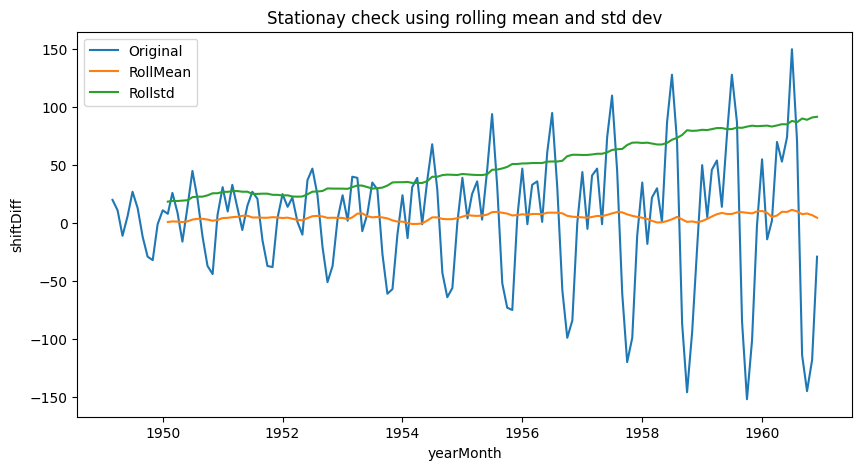

In [18]:
# Test stationarity

test_stationary(air_df.dropna(),'shiftDiff')

In [19]:
# Conclusion: The data has become stationary

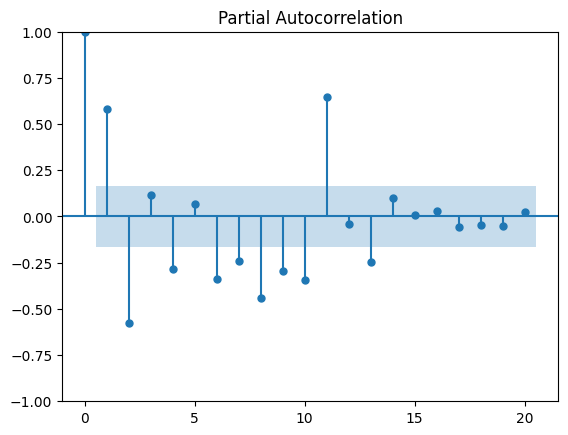

In [20]:
# ARIMA
# In Google Collab, we may need !pip install pmdarima

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_pacf(air_df['shiftDiff'].dropna(), lags=20)
plt.show()

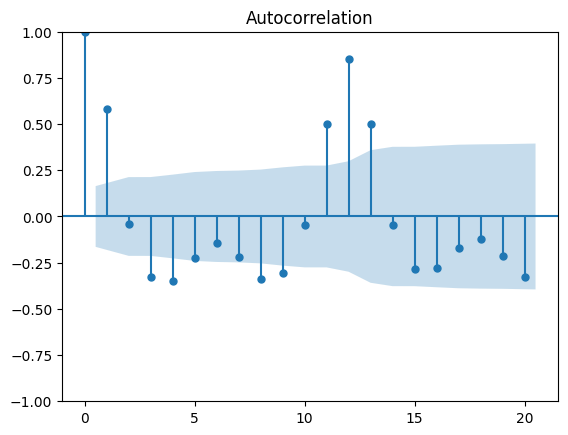

In [21]:
# Now let us take this value as p = 1 and find q, for which we need ACF

plot_acf(air_df['shiftDiff'].dropna(), lags=20)
plt.show()

In [22]:
# q also is 1

In [23]:
train = air_df[:round(len(air_df)*70/100)] # Take first 70% of data
print(train.tail()) # Just to check where it ends

test = air_df[round(len(air_df)*70/100):] # Take the last 30% of data
print(test.head()) # Just to check where it starts

            passengers  shift  shiftDiff
yearMonth                               
1957-01-01         315  271.0       44.0
1957-02-01         301  306.0       -5.0
1957-03-01         356  315.0       41.0
1957-04-01         348  301.0       47.0
1957-05-01         355  356.0       -1.0
            passengers  shift  shiftDiff
yearMonth                               
1957-06-01         422  348.0       74.0
1957-07-01         465  355.0      110.0
1957-08-01         467  422.0       45.0
1957-09-01         404  465.0      -61.0
1957-10-01         347  467.0     -120.0


In [24]:
model = ARIMA(train['passengers'], order = (1,2,1)) # parameters: p,d,q
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
air_df['arimaPred'] = prediction
print(air_df.tail())

            passengers  shift  shiftDiff   arimaPred
yearMonth                                           
1960-08-01         606  535.0       71.0  451.950367
1960-09-01         508  622.0     -114.0  454.403698
1960-10-01         461  606.0     -145.0  456.857028
1960-11-01         390  508.0     -118.0  459.310359
1960-12-01         432  461.0      -29.0  461.763689


c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


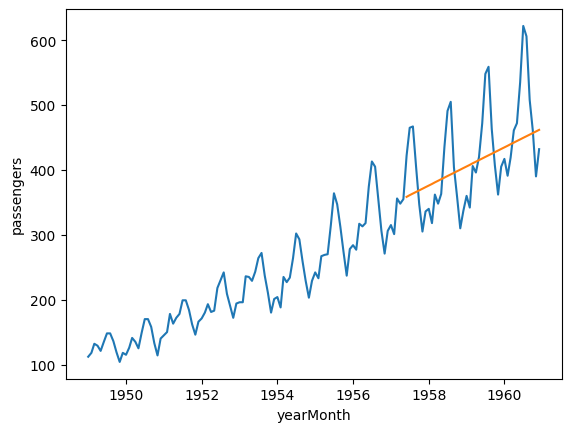

In [25]:
# Plot
sns.lineplot(data=air_df, x=air_df.index, y='passengers')
sns.lineplot(data=air_df, x=air_df.index, y='arimaPred')
plt.show()

In [26]:
# Conclusion: The ARIMA prediction is not good

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Now SARIMAX Prediction

model = SARIMAX(train['passengers'],order=(1,2,1),seasonal_order=(1,2,1,12))
model_fit = model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
air_df['sarimaPred'] = prediction
print(air_df.tail())

c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\dbda.STUDENTSDC\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


            passengers  shift  shiftDiff   arimaPred  sarimaPred
yearMonth                                                       
1960-08-01         606  535.0       71.0  451.950367  588.712781
1960-09-01         508  622.0     -114.0  454.403698  518.322965
1960-10-01         461  606.0     -145.0  456.857028  452.544738
1960-11-01         390  508.0     -118.0  459.310359  402.764154
1960-12-01         432  461.0      -29.0  461.763689  450.739646


In [28]:
# Data Looks Better

            passengers  shift  shiftDiff  arimaPred  sarimaPred
yearMonth                                                      
1949-01-01         112    NaN        NaN        NaN         NaN
1949-02-01         118    NaN        NaN        NaN         NaN
1949-03-01         132  112.0       20.0        NaN         NaN
1949-04-01         129  118.0       11.0        NaN         NaN
1949-05-01         121  132.0      -11.0        NaN         NaN


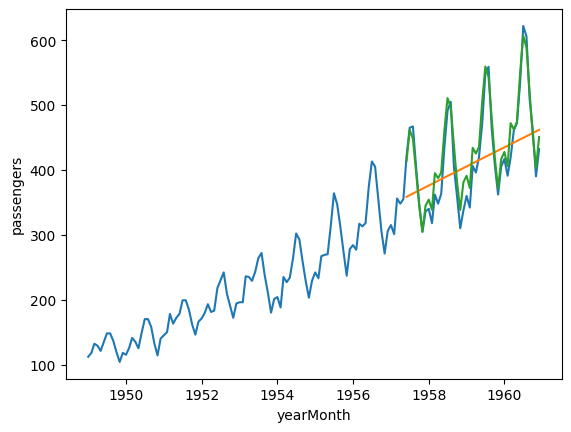

In [29]:
air_df.dropna()
print(air_df.head())
sns.lineplot(data=air_df, x=air_df.index, y='passengers')
sns.lineplot(data=air_df, x=air_df.index, y='arimaPred')
sns.lineplot(data=air_df, x=air_df.index, y='sarimaPred')
plt.show()

In [30]:
# SARIMAX predictions are much more accurate

In [31]:
# Future Prediction
# First check the last date in our dataset
print(air_df.tail())

            passengers  shift  shiftDiff   arimaPred  sarimaPred
yearMonth                                                       
1960-08-01         606  535.0       71.0  451.950367  588.712781
1960-09-01         508  622.0     -114.0  454.403698  518.322965
1960-10-01         461  606.0     -145.0  456.857028  452.544738
1960-11-01         390  508.0     -118.0  459.310359  402.764154
1960-12-01         432  461.0      -29.0  461.763689  450.739646


In [32]:
# MS: Month Start Frequency
# Create a DF to hold index values from 01.01.61 to 01.12.62
futureDate = pd.DataFrame(pd.date_range(start='1961-01-01', end='1962-12-01', freq='MS'), columns=['Dates'])
futureDate.set_index('Dates', inplace=True)
print(futureDate.head())

Empty DataFrame
Columns: []
Index: [1961-01-01 00:00:00, 1961-02-01 00:00:00, 1961-03-01 00:00:00, 1961-04-01 00:00:00, 1961-05-01 00:00:00]


In [33]:
# Predict and print
print(model_fit.predict(start=futureDate.index[0],end=futureDate.index[-1]))

1961-01-01    462.503210
1961-02-01    437.492312
1961-03-01    508.290339
1961-04-01    497.666563
1961-05-01    510.967658
1961-06-01    591.607290
1961-07-01    652.260401
1961-08-01    631.953782
1961-09-01    555.770525
1961-10-01    485.267144
1961-11-01    431.912483
1961-12-01    482.473045
1962-01-01    494.871999
1962-02-01    466.710464
1962-03-01    541.859145
1962-04-01    530.228678
1962-05-01    544.951158
1962-06-01    630.634023
1962-07-01    694.738020
1962-08-01    672.288082
1962-09-01    590.211648
1962-10-01    514.893640
1962-11-01    457.915865
1962-12-01    510.964067
Freq: MS, Name: predicted_mean, dtype: float64


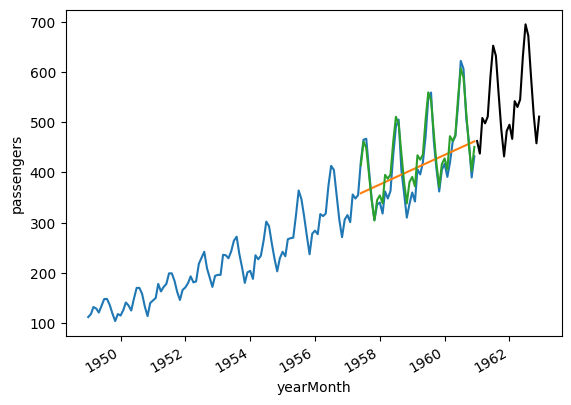

In [ ]:
# Plot
air_df.dropna()
sns.lineplot(data=air_df, x=air_df.index, y='passengers')
sns.lineplot(data=air_df, x=air_df.index, y='aribmaPred')
sns.lineplot(data=air_df, x=air_df.index, y='sarimaPred')
model_fit.predict(start=futureDate.index[0], end=futureDate.index[-1]).plot(color='black')
plt.show()

In [35]:
#Model Evaluation
airP = air_df.dropna()
from sklearn.metrics import mean_absolute_error,root_mean_squared_error, mean_squared_error, r2_score


In [36]:
#arima wvaluation
mae = mean_absolute_error(airP['passengers'], airP.arimaPred)
rmse = root_mean_squared_error(airP['passengers'], airP.arimaPred)
r2 = r2_score(airP['passengers'], airP.arimaPred)
print(f"ARIMA MAE: {mae}, RMSE:{rmse}, R^2:{r2}")

ARIMA MAE: 55.3796462443972, RMSE:69.01289539391041, R^2:0.1894657808447744


In [38]:
#Sarimax Evaluation
mae = mean_absolute_error(airP['passengers'], airP.sarimaPred)
rmse = root_mean_squared_error(airP['passengers'], airP['sarimaPred'])
r2 = r2_score(airP['passengers'], airP.sarimaPred)
print(f"SARIMAX MAE: {mae}, RMSE:{rmse}, R^2:{r2}")

SARIMAX MAE: 18.478660026026912, RMSE:22.02769227558106, R^2:0.9174249472981966
